In [1]:
# Loading required packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
# Setting default options
pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Loading required  data
df = pd.read_csv("../01_Data/01_Raw/nhis.csv.zip", compression="zip")
df.sample(5)

/var/folders/cj/jkp7xyld4_q3x3rk7xdx7jwh0000gn/T/ipykernel_36603/493222604.py:2: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../01_Data/01_Raw/nhis.csv.zip", compression="zip")


,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,REGION,PERNUM,NHISPID,HHX,...,SMKECIGRND,CIGAREV,CIGARDAYSMO,CIGAR50LIFE,CIGARFREQNOW,PIPEV,PIPEFREQNOW,NONCIGEV,NONCIGNOW,TOBLSYR
675044,2007,8678,6293,2,2007014116,2905.0,4,1,20070141160101,14116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409581,2004,10112,5226,1,2004017021,3238.0,2,2,20040170210102,17021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855340,2009,22862,6126,2,2009035766,2165.0,3,2,20090357660102,35766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586833,2016,43894,7106,42,2016052940,2829.0,3,1,20160529400101,52940,...,0.0,1.0,96.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN
1148040,2012,30790,6128,1,2012046495,479.0,3,1,20120464950101,46495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [4]:
# check values in CNLUNG
df["CNLUNG"].value_counts()

CNLUNG
0    1849834
1      61839
2       2049
9        238
7        105
Name: count, dtype: int64

In [5]:
# Subsetting the required columns, filternring for CNLUNG as 1 or 2
df_2 = df.loc[
    df["CNLUNG"].isin([1, 2]),
    ["YEAR", "CNLUNG", "ALCSTAT1", "SMOKESTATUS2", "SEX", "POORYN"],
]
df_2.sample(5)

,YEAR,CNLUNG,ALCSTAT1,SMOKESTATUS2,SEX,POORYN
429567,2004,1,3.0,20,2,9.0
629528,2006,1,3.0,30,2,2.0
1805216,2020,1,3.0,20,2,NaN
1394947,2014,1,3.0,20,2,1.0
126459,2001,1,3.0,20,1,1.0


In [6]:
# New Column to encode alcohol status
def map_alc(x):
    if x == 1:
        return "No"
    elif x == 2 or x == 3:
        return "Yes"
    else:
        return "Other"


df_2["ALC"] = df_2["ALCSTAT1"].apply(map_alc)

In [7]:
df_2["ALC"].value_counts()

ALC
Yes      45490
No        9978
Other     8420
Name: count, dtype: int64

In [8]:
# Proportion of CNLUNG=1 by ALCSTAT1 year wise, line plot
proportion_by_alc_year = (
    df_2.loc[df_2["ALC"].isin(["Yes", "No"]), :]
    .groupby(["YEAR", "ALC"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)
proportion_by_alc_year

ALC,No,Yes
YEAR,,
2000,0.023529,0.023632
2001,0.017204,0.036364
2002,0.040169,0.035138
2003,0.050526,0.038913
2004,0.028736,0.033391
2005,0.028143,0.028007
2006,0.032520,0.035633
2007,0.033058,0.040411
2008,0.029268,0.026580


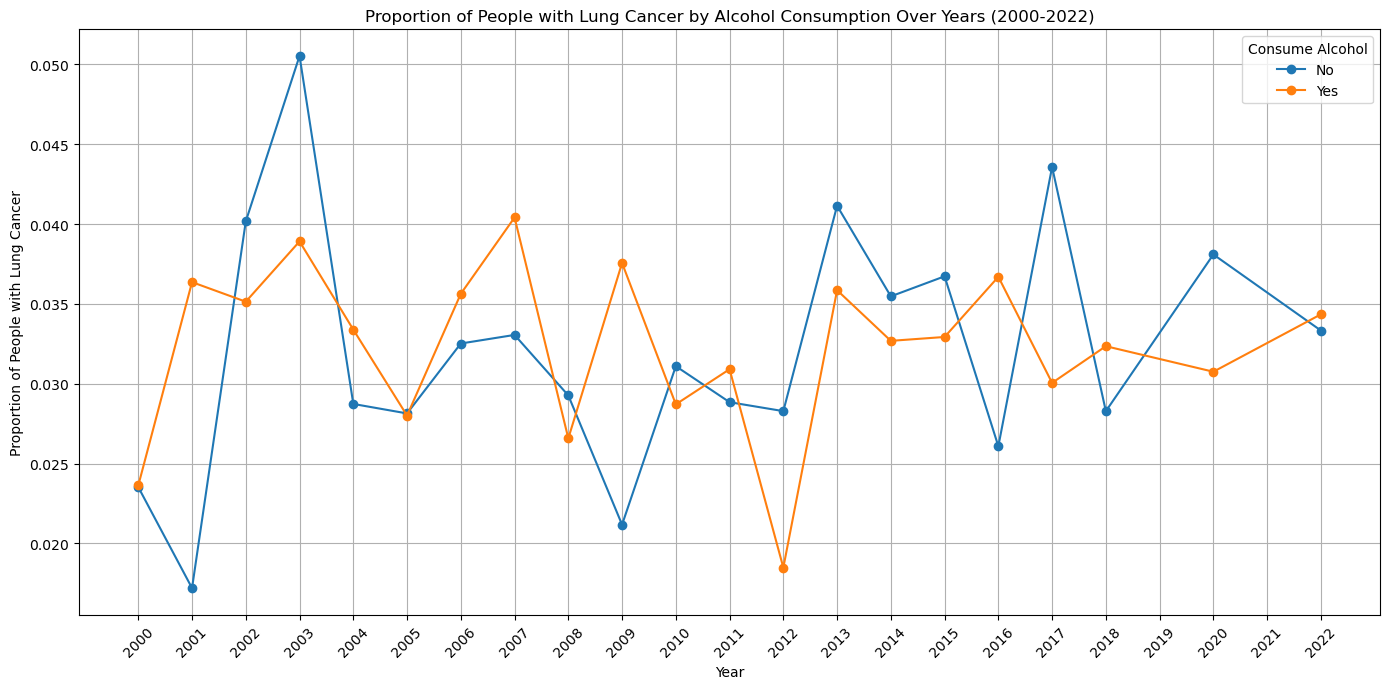

In [9]:
# Plotting
plt.figure(figsize=(14, 7))

for alc in proportion_by_alc_year.columns:
    label = alc
    plt.plot(
        proportion_by_alc_year.index,
        proportion_by_alc_year[alc],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title(
    "Proportion of People with Lung Cancer by Alcohol Consumption Over Years (2000-2022)"
)
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Consume Alcohol")
plt.grid(True)
plt.xticks(range(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

In [10]:
def map_smoke(x):
    if x == 30:
        return "No"
    elif x in [90, 00]:
        return "Other"
    else:
        return "Yes"

In [11]:
df_2["SMK"] = df_2["SMOKESTATUS2"].apply(map_smoke)
df_2["SMK"].value_counts()

SMK
Yes      32723
No       30506
Other      659
Name: count, dtype: int64

In [12]:
# Proportion of CNLUNG=1 by ALCSTAT1 year wise, line plot
proportion_by_smk_year = (
    df_2.loc[df_2["SMK"].isin(["Yes", "No"]), :]
    .groupby(["YEAR", "SMK"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)
proportion_by_smk_year

SMK,No,Yes
YEAR,,
2000,0.012474,0.032368
2001,0.003976,0.055556
2002,0.013904,0.051898
2003,0.014115,0.063545
2004,0.011331,0.050000
2005,0.009208,0.042879
2006,0.010652,0.052960
2007,0.022500,0.053135
2008,0.011682,0.040456


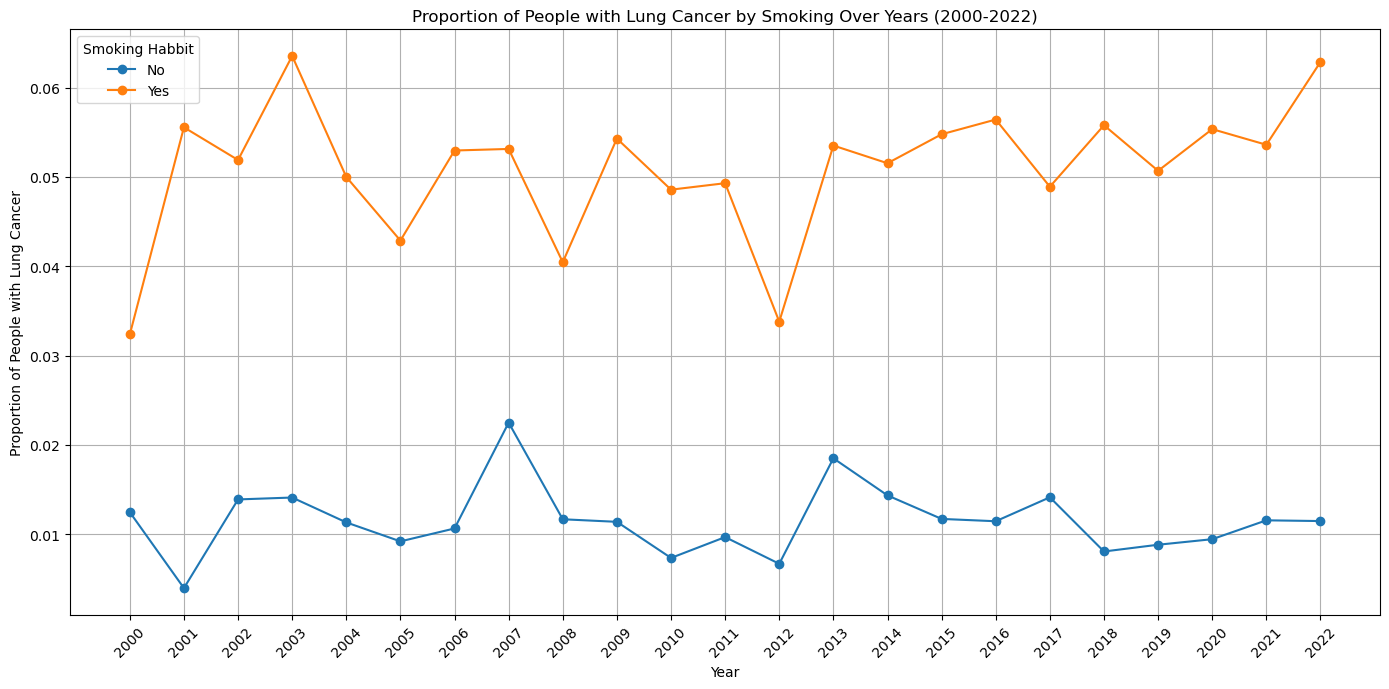

In [13]:
# Plotting
plt.figure(figsize=(14, 7))

for smk in proportion_by_smk_year.columns:
    label = smk
    plt.plot(
        proportion_by_smk_year.index,
        proportion_by_smk_year[smk],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People with Lung Cancer by Smoking Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Smoking Habbit")
plt.grid(True)
plt.xticks(range(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def map_smk_int(x):
    if x == "Yes":
        return 1
    elif x == 2:
        return "No"
    else:
        return "Other"

In [16]:
# Calculating the proportion of people who smoke based on gender
proportion_by_smk_sex_year = (
    df_2.loc[df_2["SMK"].isin(["Yes", "No"]), :]
    .groupby(["YEAR", "SEX"])["SMK"]
    .apply(lambda x: (x == "Yes").mean())
    .unstack()
)
proportion_by_smk_sex_year

SEX,1,2
YEAR,,
2000,0.680879,0.475037
2001,0.689694,0.484144
2002,0.697727,0.502972
2003,0.653944,0.512397
2004,0.644766,0.471806
2005,0.646368,0.481456
2006,0.694656,0.479698
2007,0.660895,0.460878
2008,0.618605,0.480851


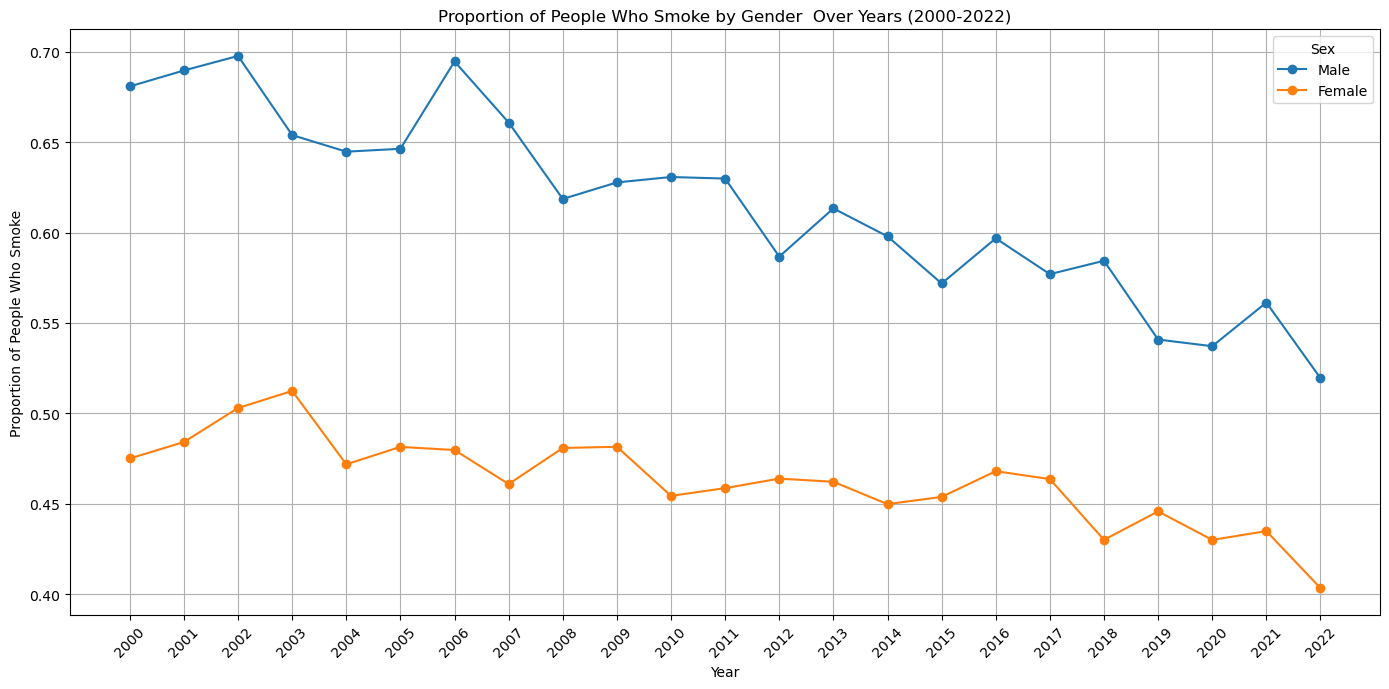

In [17]:
# Plotting
plt.figure(figsize=(14, 7))
sex_labels = {1: "Male", 2: "Female"}

for sex in proportion_by_smk_sex_year.columns:
    label = sex_labels.get(sex)
    plt.plot(
        proportion_by_smk_sex_year.index,
        proportion_by_smk_sex_year[sex],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People Who Smoke by Gender  Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People Who Smoke")
plt.legend(title="Sex")
plt.grid(True)
plt.xticks(range(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Calculating the proportion of people who smoke based on poverty status
proportion_by_smk_poverty_year = (
    df_2.loc[(df_2["SMK"].isin(["Yes", "No"])) & (df_2["POORYN"] != 9.0), :]
    .groupby(["YEAR", "POORYN"])["SMK"]
    .apply(lambda x: (x == "Yes").mean())
    .unstack()
)
proportion_by_smk_poverty_year

POORYN,1.0,2.0
YEAR,,
2000,0.553725,0.662037
2001,0.576375,0.612335
2002,0.596491,0.619048
2003,0.576373,0.632653
2004,0.549933,0.560386
2005,0.555761,0.584475
2006,0.570053,0.541667
2007,0.553474,0.542105
2008,0.522431,0.606635


In [22]:
df_2["POORYN"].value_counts()

POORYN
1.0    37004
9.0     6826
2.0     5091
Name: count, dtype: int64

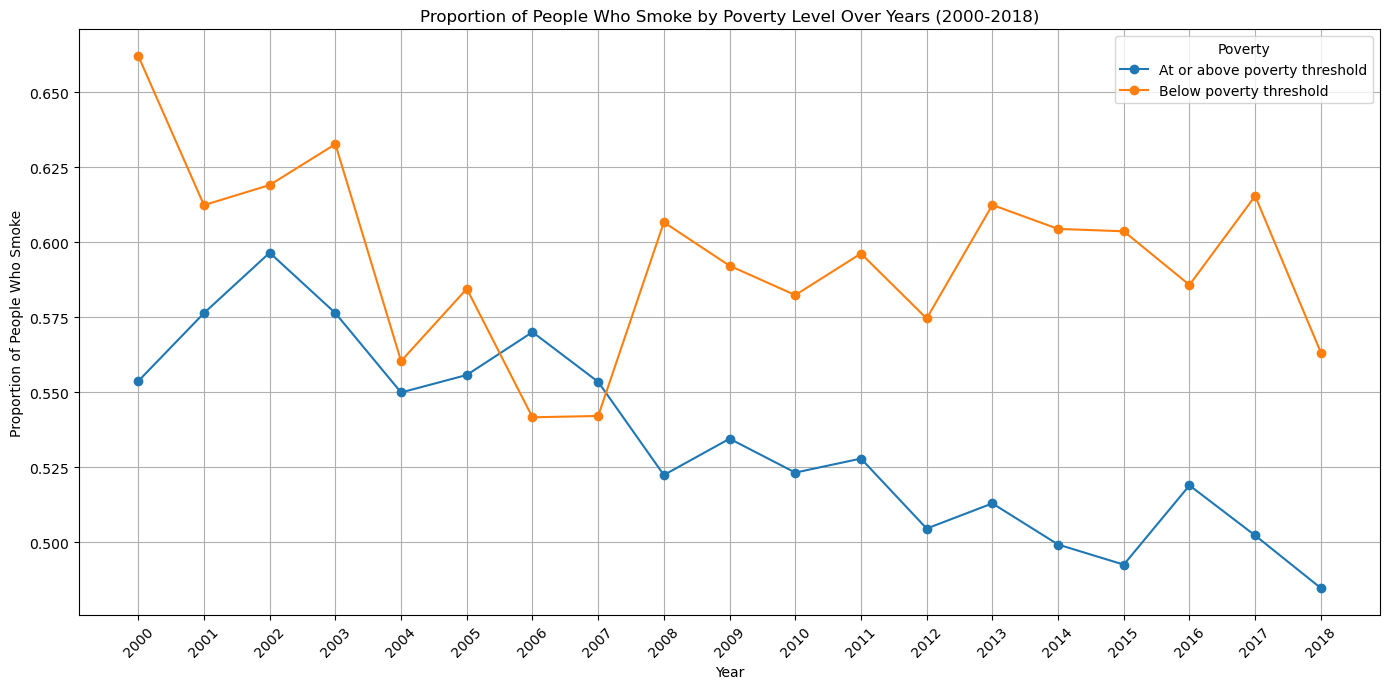

In [27]:
# Plotting
plt.figure(figsize=(14, 7))
poverty_labels = {
    1.0: "At or above poverty threshold",
    2.0: "Below poverty threshold",
    9.0: "Unk (1997+: incl. Undefined)",
}

for poverty in proportion_by_smk_poverty_year.columns:
    label = poverty_labels.get(poverty)
    plt.plot(
        proportion_by_smk_poverty_year.index,
        proportion_by_smk_poverty_year[poverty],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People Who Smoke by Poverty Level Over Years (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Proportion of People Who Smoke")
plt.legend(title="Poverty")
plt.grid(True)
plt.xticks(range(2000, 2019), rotation=45)
plt.tight_layout()
plt.show()